<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 9</div>
<div style="text-align: right">Dino Konstantopoulos, 27 March 2019</div>

# Lab: Machine Learning (ML) with Keras

#### What about human brains?

The average human brain has about 100 billion neurons (nerve cells)
- Jellyfish: 800
- Snail: 11,000
- Fruit Fly: 100,000
- Ant: 250,000
- Honey Bee: 960,000
- Rat: 200,000,000
- Cat: 760,000,000
- Human: 86,000,000,000 (10$^{11}$)

The average human brain has about 10$^{14}$ synapses (interconnections between neurons)in the neocortex (sight and hearing), and about 10$^{15}$ synapses in the entire nervous system. For the neocortex:
- Rat: 10$^{10}$
- Cat: 10$^{12}$
- Human: 10$^{14}$

The chemical connection between neurons are effectively **analog**, or floating-point. Each neuron operates once every 10 ms or 100 times per second, so the correct term isn't "bits per second" but FLOPS. Collectively, an estimate based on common google searches is 700 exaFLOP per second. For reference, the new supercomputer being installed at Argonne Labs operates at 1 exaFLOPS, no training (software).

<br />
<center>
<img src =ipynb.images/hu-brain.jpg width = 200 />
</center>

#### How about large objects?

Stars in the Milky Way: 200 billion stars

Galaxies in the Universe: 100 billion galaxies

Atoms in the Universe: ~10$^{80}$. This only accounts only for the observable universe which reaches 46 billion light years in any direction, and is based on where the expansion of space has taken the most distant objects observed
Within this observable universe, this matter is spread homogeneously throughout space, at least when averaged over distances longer than 300 million light-years.

<br />
<center>
<img src =ipynb.images/milkyway.jpg width = 400 />
    *Our Milky Way*
</center>

On smaller scales, however, matter is observed to form into the clumps of hierarchically-organized luminous matter that we are all familiar with. Most atoms are condensed into stars, most stars are condensed into galaxies, most galaxies into clusters, most clusters into superclusters and, finally, into the largest-scale structures like the [**Great Wall of galaxies**](https://en.wikipedia.org/wiki/Sloan_Great_Wall).

<br />
<center>
<img src =ipynb.images/greatwall.jpg width = 400 />
    *Looks like a brain to me..*
</center>

#### How about scales?

- Billion (Giga): 10$^{9}$
    - Neurons in a human brain
    - Stars in the Milky Way
    - How many dollars americans owe
- Trillion (Tera): 10$^{12}$
- Quadrillion (Peta): 10$^{15}$
- Quintillion (Exa): 10$^{18}$
- Sextillion (Zeta): 10$^{21}$
    - Stars in the Universe
    - Data produced by the human race
- Septillion (Yotta): 10$^{24}$
    - Atoms in the Universe
- Googol: 10$^{100}$
    - 10,001st Fibonacci number
- Googolplex: 10$^{googol}$


#### How about today's machines?

<br />
<center>
<img src =ipynb.images/asus.png width = 800 />
</center>

**Nvidia** was first to produce a chip capable of programmable shading, the GeForce 3. 
Each pixel could now be processed by a short program that could include additional image textures as inputs, and each geometric vertex could likewise be processed by a short program before it was projected onto the screen.

Used in the Xbox console, it competed with the PlayStation 2 (which used a custom vector DSP for hardware accelerated vertex processing). 
By October 2002, with the introduction of the ATI Radeon 9700 (also known as R300), the world's first Direct3D 9.0 accelerator, pixel and vertex shaders could implement looping and lengthy floating point math, and were quickly becoming as flexible as CPUs, yet orders of magnitude faster for image-array operations.
Nvidia's **CUDA** platform, first introduced in 2007, was the earliest widely adopted programming model for GPU computing
More recently **OpenCL** has become broadly supported, an open standard defined by the Khronos Group which allows for the development of code for both GPUs and CPUs with an emphasis on portability. 
OpenCL solutions are supported by Intel, AMD, Nvidia, and ARM, and according to a recent report by Evan's Data, OpenCL is the GPGPU development platform most widely used by developers in both the US and Asia Pacific. 

CUDA is specifically for NVIDIA GPUs while OpenCL is designed to work across a multitude of architectures including GPU, CPU and DSP.

#### Common GPUs found today on advanced laptops: 

- Nvidia GTX 1080: $500
8873 GFLOPS, 7.2 billion transistors
2560 NVIDIA CUDA Cores and 8GB GDDR5X 

- Nvidia GTX 1070: $300
1920 CUDA cores and 8GB GDDR5X

It takes about 20 transistors to form an AND gate, which is equivalent to a neuron (fires or does not fire depending on input signal). So in terms of hardware, we are still below the density of a human brain by an order of magnitude. In terms of software, Google's deep mind brain used 16,000 processors with around 1 billion intetrconnections. So, still well below the density of the human brain. And your laptop consumes an order of magnitude more power than your brain. But when you shut off your computer, nothing happens to it. When oxygen fails to reach a neuron, it dies in a few minutes.

<br />
<center>
<img src =ipynb.images/gtx-nividia.png width = 800 />
</center>


# 1. Keras

Keras (κέρας) means [horn](https://en.wikipedia.org/wiki/Horn_(anatomy) in greek. It's a reference to a literary image from ancient Greek and Latin literature, first found in the [Odyssey](https://en.wikipedia.org/wiki/Odyssey), where dream spirits (Oneiroi, singular Oneiros) are divided between those who deceive with false visions and arrive to Earth through a gate of ivory ([blue pill](https://en.wikipedia.org/wiki/Red_pill_and_blue_pill) in [the Matrix®](https://en.wikipedia.org/wiki/The_Matrix)), and those who announce a future that will come to pass and arrive through a gate of horn ([red pill](https://en.wikipedia.org/wiki/Red_pill_and_blue_pill) in [the Matrix®](https://en.wikipedia.org/wiki/The_Matrix)). Also heavily referenced in [Harry Potter](https://en.wikipedia.org/wiki/Magical_creatures_in_Harry_Potter).

*Oneiroi are beyond our unravelling --who can be sure what tale they tell? Not all that men look for comes to pass. Two gates there are that give passage to fleeting Oneiroi; one is made of horn, one of ivory. The Oneiroi that pass through sawn ivory are deceitful, bearing a message that will not be fulfilled; those that come out through polished horn have truth behind them, to be accomplished for men who see them*. - Homer, Odyssey 19 (Shewring translation).

`Keras` is a minimalist, modular Neural Networks **API**, written in Python and capable of running on top of either TensorFlow or Theano (so it's really an API over an API). Developed with a focus on going from idea to result with the least possible delay, for fast prototyping (modularity, minimalism, extensibility). It supports both convolutional networks and recurrent networks, as well as combinations. It supports arbitrary connectivity schemes (including multi-input and multi-output training). It runs seamlessly on CPUs and GPUs. Initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System). Written by one person, [François Chollet](https://scholar.google.com/citations?user=VfYhf2wAAAAJ&hl=en).

`Tensorflow` is Google's Machine Learning framework, while `Theano` is a framework written by [Yoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio) and his team at the University of Montreal.

There are many quality deep learning frameworks to choose from, but the Keras framework is easy to get started with because of its intuitive high-level API. You can quickly prototype and develop new models.

François Chollet, now a deep learning researcher at Google, developed the framework as part of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System). In 2017, Google’s TensorFlow team decided to support Keras in TensorFlow’s core library. Microsoft added a CNTK back end to the framework, which was available as of CNTK v2.0.

François Chollet describes Keras in the following way:
- Another important decision was to use an object-oriented design. Deep learning models can be understood as chains of functions, thus making a functional approach look potentially interesting. However, these functions are heavily parameterized, mostly by their weight tensors, and manipulating these parameters in a functional way would just be impractical. So in Keras, everything is an object: layers, models, optimizers, etc. All parameters of a model can be accessed as object properties: e.g. `model.layers[3].output` is the output tensor of the 3rd layer in the model, `model.layers[3].weights` is the list of symbolic weight tensors of the layer, and so on.

Though developers initially built Keras on top of `Theano`, its abstraction ability made it easy for them to add TensorFlow shortly after Google released the back end. Eventually, the Keras API was implemented as part of Google TensorFlow.
Now, the deep learning front end supports a number of back end implementations: TensorFlow, Theano, Microsoft Cognitive Toolkit (CNTK), Eclipse Deeplearning4J, and Apache MXNet.

The framework runs on both CPUs and GPUs. It can use single or multiple GPUs to train deep neural networks, or it can run on a GPU using the NVIDIA CUDA Deep Neural Network GPU-accelerated library (cuDNN). This approach is much faster than a typical CPU because developers designed Keras to deal with parallel computation.

It has been open sourced since its initial release in March 2015. Its documentation can be found on [keras.io](https://keras.io/) with source code on [GitHub](https://github.com/keras-team/keras).

Keras' `Sequential model` is a linear stack of layers. You create a Sequential model by passing a list of layer instances to the constructor:

Before training a model, you configure the learning process with 3 parameters:
- Optimizer: This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class 

- Loss function: This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function

- List of metrics: For any classification problem you will want to set this to metrics=['accuracy']

References:

- http://keras.io/ 
- http://keras.io/documentation/ 
- http://robotfuture.net 
- https://github.com/fchollet/keras 

# 2. Five neurons (review)

We have a neuron that has 3 neurons upstream (in-signal) and another 2 neurons downstream (out-signal).

Indexes for the incoming nodes (`fromNodes`), and the result nodes (`toNodes`):

In [59]:
toNodes = range(4, 6)
fromNodes = range(0, 3)
allNodes = range(0, 6)
print ('in-signal from neurons', [i for i in fromNodes])
print ('out-signal towards neurons', [i for i in toNodes])
print ('I am neuron #3')

in-signal from neurons [0, 1, 2]
out-signal towards neurons [4, 5]
I am neuron #3


In [60]:
bias       = [0.2, -0.1, 0.5, 0.1, 0.4, 0.9] # one per neuron
activation = [0.8, -0.3, -0.8, 0.1, 0.5, 0.9] # the amount of signal it takes to wake up each
netInput   = [0, 0, 0, 0, 0, 0] # initial input into each neuron
weights = [[ 0., 0., 0., 0.1, 0., 0.],  # weights matrix only w03, w13, w23, w34, and w35 are non-zero
          [ 0., 0., 0., -0.3, 0., 0.], 
          [ 0., 0., 0., 0.2, 0., 0.], 
          [ 0., 0., 0., 0., 0.1, -0.8], 
          [ 0., 0., 0., 0., 0., 0.], 
          [ 0., 0., 0., 0., 0., 0.]]

`toNodes` receive signals, `fromNodes` send them. Let's see who receives based on what is sent: 

for i in toNodes:
    netInput[i] = bias[i]
    for j in fromNodes:
        netInput[i] += (weights[i][j] * activation[j]) 
netInput

Which is the same if we look at the entire matrix:

In [61]:
for i in allNodes:
    netInput[i] = bias[i]
    for j in allNodes:
        netInput[i] += (weights[i][j] * activation[j]) 
netInput

[0.21000000000000002, -0.13, 0.52, -0.5700000000000001, 0.4, 0.9]

Which you can do with a list comprehension:

In [62]:
netinput_nonzero = [bias[i] + sum([weights[i][j] * activation[j] for j in fromNodes]) for i in toNodes]
netinput_nonzero

[0.4, 0.9]

..or also with a simple linear algebra formula:

In [63]:
import numpy as np
net_state = np.array(bias) + np.array(weights) @ np.array(activation)
net_state 

array([ 0.21, -0.13,  0.52, -0.57,  0.4 ,  0.9 ])

.. and that is why we learned **linear algebra**, isn't the formula above much simpler than using indexes, loops, or list comprehensions?

Now, this is the non-linear activation function happening at each neuron:

In [64]:
import math
def activationFunction(netInput):
    return 1.0 / (1.0 + math.exp(-netInput))

And so the output from each neuron is not really just what it receives from the upstream neurons, but what it receives *transformed by the activation function*:

In [65]:
for i in allNodes:
    activation[i] = activationFunction(net_state[i])
activation

[0.5523079095743253,
 0.4675456936126812,
 0.6271477663131956,
 0.36123682485115804,
 0.598687660112452,
 0.7109495026250039]

In one formula:

In [66]:
net_state = activationFunction ( np.array(bias) + np.array(weights) @ np.array(activation) )
net_state

TypeError: only size-1 arrays can be converted to Python scalars

..oops! Why? We need to **vectorize** the activation function so it can work on vector inputs.

In [67]:
def add_one(v):
    return v + 1

np.vectorize(add_one)([1,2,3])

array([2, 3, 4])

In [68]:
activationFunction_v = np.vectorize(activationFunction)
new_net_state =  activationFunction_v( np.array(bias) + np.array(weights) @ np.array(activation) )
new_net_state 

array([0.55875817, 0.44809491, 0.63928158, 0.39917811, 0.59868766,
       0.7109495 ])

Wow! One operation and we have the next state of our neural network :-)

If the neuron received *no new inputs*, you could now theoretically compute the long-term state of the neural network, just by figuring out the dominant eigenvector!

# 3. One Neuron model with Keras

This is a single neuron in your brain:
<center>
<img src =ipynb.images/neuron1.png width = 400 />
</center>

<br />
<center>
<img src =ipynb.images/neuron.png width = 400 />
</center>

This is the artificial equivalent, with many inputs going into that neuron, and multiple outputs:
<br />
<center>
<img src =ipynb.images/neuron-many.png width = 400 />
</center>

I am confident you can write this in python because we *learned linear algebra* in class, and the equation above is nothing more than a matrix (neuron weights per synapse) mutlipled by a (input) vector, leading to another (output) vector. If i asked you in your final exam to compute the dominant eigenvector *of your brain*, you could do that, right?

Now, with a **single input** and **a single output**, thus a **single synapse** for the neuron, it simplifies to:
<br />
<center>
<img src =ipynb.images/neuron-one.png width = 400 />
</center>

$w_0$ is the *bias* of the neuron: It fires *irrespective* of the input, because your neuron has been preconditioned by long-term past input. It's as if your boyfriend says *I don't want you to see Lin Kai again*, and you snap and you say *stop being jealous!*. Would you say that if that's the first time he asked you not to see someone? **No**, but what if it's the thousand-th time?

Let's plot some ridiculously simple data to model with an artificial neural network (ANN) composed of a single neuron with a single synapse. Not possible to do simpler!


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
sns.set_context('talk')

This is the signal we're going to auto-encode:

Text(0, 0.5, 'b')

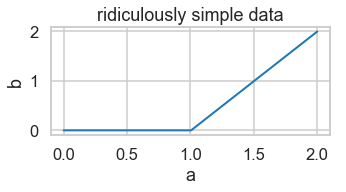

In [70]:
%matplotlib inline

n_points = 200
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points / 2) + list(x[:int(n_points / 2)])) * 2

plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('ridiculously simple data')
plt.xlabel('a')
plt.ylabel('b')

Now let's build a network with a single neuron with `Keras`, with the simplest nonlinear activation function ([ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))), which looks supsiciously similar to the input data (and so professor is cheating because he knows we should be pretty successful modeling a function that looks like the activation function of our neurons), to auto-encode our input data (in other words, the output should be the same as the input). The error metric in training is the means squared error between the data and the model output, and the training optimizer algorithm is stochastic gradient descent (we'll reexamine training algorithms in later lectures). 


In [71]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import numpy as np
import os

np.random.seed(0)
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

ModuleNotFoundError: No module named 'keras'

Let's save our training history by defining, and then calling, the following function:

In [16]:
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
history = TrainingHistory()

ModuleNotFoundError: No module named 'keras'

Let's train our neuron with 2000 traning timesteps, using no additional hyperparameters.

In [17]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
model.fit(X_train,
          Y_train,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

NameError: name 'model' is not defined

Now let's print our neuron's *weights*. That is your *model* in the same way that an analytic pdf is the model of your data. 

In the case of ANNs, the model consists of the weights of your ANNs neurons. In the case of *you*, your total identity as a person different from the person sitting next to you is contained in the weights of the neurons in your brain!

In [18]:
# print trained weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

NameError: name 'model' is not defined

Uh-oh.. one of the weight is *zero*. Bad news.. Did we successfully model our ridiculously simple data? Let's see.

Create folders `ml_images` and `ml_videos` in your `C:\Users\<username>` folder.

NameError: name 'history' is not defined

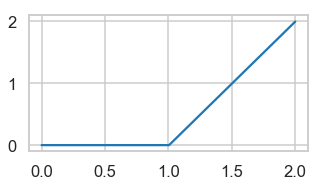

In [19]:
# save the animation
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

Yup, that didn't work too well, did it?

Let's build animations to debug the process. This is pretty much how you debug machines: You inspect them after every training state. Training *is* the program. 

You're going to need to download ffmpeg *and* install it at `C:\ffmpeg`.

- For Windows: https://ffmpeg.zeranoe.com/builds/
- Directions: http://www.wikihow.com/Install-FFmpeg-on-Windows 
- For OSX: http://www.renevolution.com/ffmpeg/2013/03/16/how-to-install-ffmpeg-on-mac-os-x.html 

To reset your PATH environment variable without killing and restarting your command console:
SET PATH=%PATH%;C:\ffmpeg\bin

To do it all in the same notebook, run the cell below.

Now, let's use `ffmpeg` to create a video of the training process in the neuron. Imagine if we could create videos of the neurons in your brain learning..

In [20]:
import os
# add to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/ffmpeg/bin'

Note that you may need an extra `/` at the end of `C:/ffmpeg/bin`. Note that on the Mac, it installs in `/usr/local/bin` automatically, so that is the path you will need. You may also have to include it in your PYTHONPATH environment variable. Afterwards, you should be able to run:
```python
!ffmpeg -version
```
in the cell below

In [21]:
!ffmpeg -version

/bin/sh: ffmpeg: command not found


You're going to have to create folders referenced in the cells below. **Read and understand the code** before you execute it.

In [22]:
def update_line(num):
    plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
    line.set_xdata(x)
    line.set_ydata(history.predictions[num])
    return []

ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('ml_videos2/neuron.mp4', fps=30, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])

NameError: name 'history' is not defined

Run the file `ml_videos2/neuron.mp4`. What happens?

This is the learning starting point:

NameError: name 'history' is not defined

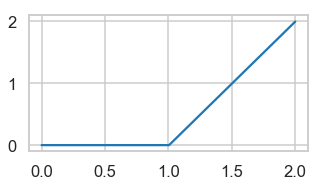

In [23]:
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, history.predictions[0], label='prediction')
plt.legend(loc='upper left')
plt.title('iteration: 0')
plt.savefig('ml_images2/neuron_start.png')

This is the learning ending point:

NameError: name 'history' is not defined

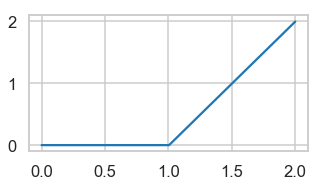

In [24]:
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, history.predictions[30], label='prediction')
plt.legend(loc='upper left')
plt.title('iteration: 30')
plt.savefig('ml_images2/neuron_finish.png')

This is the training error:

In [25]:
plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

NameError: name 'history' is not defined

<Figure size 432x216 with 0 Axes>

Did the training error improve (get reduced)? Is your end state different from your start state? Did your artificial neural network learn anything?

Hmm... Does not look like we are learning very much. Let's modify with learning hyperparameter `batch_size`, so we're actually running a mini-batch neural network.

`batch_size` defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated through all samples of the network. A problem usually happens with the last set of samples. In our example we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:
- It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. 

Disadvantages of using a batch size < number of all samples:
- The smaller the batch the less accurate the estimate of the gradient will be.

In [26]:
# Part 6: larger batch size

history = TrainingHistory()
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train,
          Y_train,
          batch_size=200,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

NameError: name 'TrainingHistory' is not defined

Now let's look at our training error now.

In [27]:
plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

NameError: name 'history' is not defined

<Figure size 432x216 with 0 Axes>

Much better! It looks like we're learning something!

Ok, just to make sure this is not by chance, let's shuffle our random number generator, repeat, compare our neuron's weights before and after training, plot training error, and visualize the training process.

In [28]:
np.random.seed(2)
history = TrainingHistory()
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

NameError: name 'TrainingHistory' is not defined

In [29]:
model.fit(X_train,
          Y_train,
          batch_size=200,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))
print('dying ReLU problem!')
print('http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks')

NameError: name 'model' is not defined

Read about the dying ReLU problem [here](http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks).

before training:

NameError: name 'history' is not defined

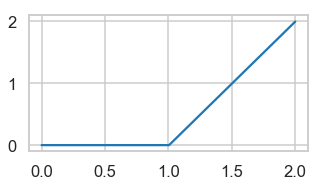

In [30]:
fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')

after training:

NameError: name 'history' is not defined

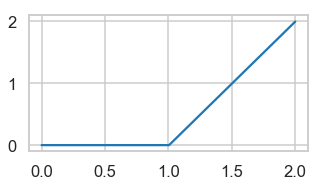

In [31]:
fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[30],  label='prediction')
plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')

training error:

In [32]:
plt.figure(figsize=(5, 2.5))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

NameError: name 'history' is not defined

<Figure size 360x180 with 0 Axes>

save training animation in file `ml_videos2/neuron2.mp4`:

In [33]:
ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('ml_videos2/neuron2.mp4', fps=30, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])

NameError: name 'history' is not defined

Now run your video `ml_videos2/neuron2.mp4` abd see what your network learned!

# 4. 60 Neurons model with Keras

Ok, now we're ready to model more complicated data, using more neurons and more complicated network architectures. 

We're going to use a single hidden layers of 60 neurons first, and after that we're going to modify to a double hidden layer of equal complexity (which mean same *number* of neural weights). How many neurons per layer for the two-layer ANN? **Think about this**, figure out the answer, and **tell professor** before proceeding to the next cell.

<br />
<center>
<img src =ipynb.images/neurons-60.png width = 400 />
</center>

We're going to model a noisy sine curve:

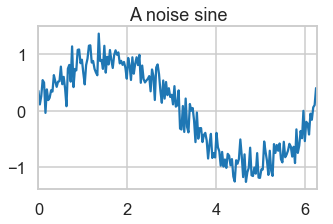

In [34]:
np.random.seed(0)
x = np.linspace(0, 2 * math.pi, 200)
sine = np.sin(x)
err = np.random.normal(0, 0.2, len(sine))
y = sine + err
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.xlim([0, 2 * math.pi])
plt.title('A noise sine')
plt.show()

In [35]:
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

ModuleNotFoundError: No module named 'keras'

In [36]:
history = TrainingHistory()
res = model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

NameError: name 'TrainingHistory' is not defined

In [37]:
import matplotlib.animation as animation

def visualize_training(history, name):
    fig = plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    line, = plt.plot(x, history.predictions[0],  label='prediction')
    plt.legend()

    def update_line(num):
        plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
        line.set_xdata(x)
        line.set_ydata(history.predictions[num])
        return []

    ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                       interval=50, blit=True)
    ani.save('ml_videos2/{0}.mp4'.format(name), dpi=100, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])
    plt.close()

    plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    plt.plot(x, history.predictions[0], label='prediction')
    plt.legend()
    plt.title('iteration: 0')
    plt.savefig('ml_images2/{0}.png'.format(name))
    plt.close()

    plt.figure(figsize=(6, 3))
    plt.plot(history.losses)
    plt.ylabel('error')
    plt.xlabel('iteration')
    plt.ylim([0, 0.5])
    plt.title('training error')
    plt.show()

Let's visualize training error:

In [38]:
visualize_training(history, 'noisy-sine-one-layer')

NameError: name 'history' is not defined

Examine the new `noisy-sine-one-layer.mp4` file in your `ml_videos2` folder (but *wait for training to finish!*). Are we learning? 

Hmmm.. Looks like we're not learning. One layer is not enough! That's what led researchers in the 1960s to say that neural networks don't work! But then researchers in Canada in the 1980s thought about adding hidden layers..

So let's increase our architecture to two layers, with 10 neurons in each layer, while keeping the same network complexity (i.e. the same number of weights in the connections between neurons). As you guessed previously, that leads to 10 (weights corresponding to connections between input node and first hidden layer) + 100 (weights corresponding to connections between the two hidden layers) + 10 (weights corresponding to connections between second hidden layer and output node) weigths overall, which is similar to the number of weights of our single layers with 60 neurons (60 + 60). So, equal complexity, but more hidden layers.

<br />
<center>
<img src =ipynb.images/neurons-10-10.png width = 200 />
</center>

In [39]:
n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-two-layer')

NameError: name 'Sequential' is not defined

Examine the new `tiny-sine-two-layer.mp4` file in your `ml_videos2` folder.

Much better! 

Now, for a different kind of impreovement on the single one layer: Let's use an optimizer (ADAM), so you can see that a single layer can get it right, too!

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980). 

Gentle Introduction to the Adam Optimization Algorithm for Deep Learning
by Jason Brownlee on July 3, 2017 in Better Deep Learning
Tweet   Share 
The choice of optimization algorithm for your deep learning model can mean the difference between good results in minutes, hours, and days.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. It is used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“. I will quote liberally from their paper in this post, unless stated otherwise.

The algorithm is called Adam. It is not an acronym and is not written as “ADAM”. The name Adam is derived from **adaptive moment estimation**.

When introducing the algorithm, the authors list the attractive benefits of using Adam on non-convex optimization problems, as follows:

- Straightforward to implement.
- Computationally efficient.
- Little memory requirements.
- Invariant to diagonal rescale of the gradients.
- Well suited for problems that are large in terms of data and/or parameters.
- Appropriate for non-stationary objectives.
- Appropriate for problems with very noisy/or sparse gradients.
- Hyper-parameters have intuitive interpretation and typically require little tuning.

Stochastic gradient descent (we learned about this in our previous lecture) maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds. The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

- Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

- Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam is a very popular algorithm in the field of deep learning because it achieves good results *fast*. Let's apply it to our *single layer: network:

In [40]:
from keras.optimizers import Adam

n_conn = 60
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-one-layer-adam')

ModuleNotFoundError: No module named 'keras'

Examine `tiny-sine-one-layer-adam.mp4`. Wow, *now* we're learning!

But that does not necessarily mean you can get similar improvements with the same optimizer on the two-layer version! That's the dark art of **hyperparameter turning**.

In [41]:
from keras.optimizers import Adam

n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-two-layer-adam')

ModuleNotFoundError: No module named 'keras'

Examine `tiny-sine-two-layer-adam.mp4`. Looked promising at the beginning, we reduced the training error by half the amount at the same timestep with the non-adam version, but the training error stopped improving after a certain point.

# 5. Image Classification with CIFar10

Ok, by now you should know how artificial neural networks work, at least as autoencoders. Now let's do some real Machine Learning and classify images, instead of autoencoding using the CIFAR10 dataset. This means we don;t have to learn the entire signal, we just have to learn how to discriminate between 10 different *kinds* of images.

It's as if you don't have to learn *everything* about *all* potential girlfriends, but only to distinguish between the high-maintenance ones, and the low-maintenance ones.

Noe, please switch to notebook `keras-cifar10-load_model.ipynb`, which loads pre-trained network weights from my laptop, and run the rest of this notebook at home, because it might take your laptop all night to train over the CIFar10 dataset!

In [42]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

ModuleNotFoundError: No module named 'keras'

In [43]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

We load CIFAR10 straight from Keras:

In [44]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

NameError: name 'cifar10' is not defined

Let's split into training and testing datasets:

In [45]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

NameError: name 'keras' is not defined

Let's build a 3-layers convolutional ANN, also called a [CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network). It's a specific kind of neural architecure, similar to the neural connections of your vision circuits. Typically, you use CNNs for vision, and [RNNs](https://en.wikipedia.org/wiki/Recurrent_neural_network) for language.

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

NameError: name 'Sequential' is not defined

In [47]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

NameError: name 'keras' is not defined

Let's train our model. That will take some time on your laptop. You won't be finished in class.

In [48]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

NameError: name 'model' is not defined

This will take a long time to compute: Make sure you're plugged in, and ready to **do something else** while your laptop sweats it out:

In [49]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
        # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.


NameError: name 'ImageDataGenerator' is not defined

Now save the neural weights for later use.

In [50]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

NameError: name 'model' is not defined

In [51]:
#extra cell

In [52]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: name 'model' is not defined

This is a comprehensive routine to show images from cifar10, given indexes into the dataset:

In [53]:
#Visualizing CIFAR 10, takes indicides and shows in a grid
def cifar_grid(X,Y,inds,n_col, predictions=None):
  import matplotlib.pyplot as plt
  import math
  if predictions is not None:
    if Y.shape != predictions.shape:
      print("Predictions must equal Y in length!\n")
      return(None)
  N = len(inds)
  n_row = int(math.ceil(1.0*N/n_col))
  fig, axes = plt.subplots(n_row,n_col,figsize=(10,10))
  
  clabels = labels["label_names"]
  for j in range(n_row):
    for k in range(n_col):
      i_inds = j*n_col+k
      i_data = inds[i_inds]
      
      axes[j][k].set_axis_off()
      if i_inds < N:
        axes[j][k].imshow(X[i_data,...], interpolation="nearest")
        label = clabels[np.argmax(Y[i_data,...])]
        axes[j][k].set_title(label)
        if predictions is not None:
          pred = clabels[np.argmax(predictions[i_data,...])]
          if label != pred:
            label += " n"
            axes[j][k].set_title(pred, color="red")
  
  fig.set_tight_layout(True)
  return fig


This is a comprehensive routine to load cifar10 data:

In [54]:
def setup_load_cifar(verbose=False):
  import os,shutil
  from keras.datasets import cifar10
  from keras.utils import to_categorical
  
  #datadir = os.path.expanduser("~") + "/.keras/datasets/"
  datadir = "/data"
  datafile = datadir+"cifar-10-batches-py.tar.gz" # the name keras looks for
  
  #if not os.path.isfile(datafile):
  #  os.makedirs(datadir)
  #  shutil.copyfile($$ref{{["~:output","119210b3-a610-428e-93f2-ad5d987f442b","cifar-10-python.tar.gz"]}}, datafile)
  
  # The data, shuffled and split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  if verbose:
    print("x_train shape: {}, {} train samples, {} test samples.\n".format(
      x_train.shape, x_train.shape[0], x_test.shape[0]))
  
  # Convert class vectors to binary class matrices.
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)
  
  x_train = x_train.astype("float32")
  x_test = x_test.astype("float32")
  x_train /= 255.0
  x_test /= 255.0
  
  # Load label names to use in prediction results
  label_list_path = "datasets/cifar-10-batches-py/batches.meta"
  
  keras_dir = os.path.expanduser(os.path.join("~", ".keras"))
  datadir_base = os.path.expanduser(keras_dir)
  if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join("/tmp", ".keras")
  label_list_path = os.path.join(datadir_base, label_list_path)
  
  with open(label_list_path, mode="rb") as f:
    labels = pickle.load(f)
  
  return x_train, y_train, x_test, y_test, labels

`dill` extends python’s pickle module for serializing and de-serializing python objects to the majority of the built-in python types. Serialization is the process of converting an object to a byte stream, and the inverse of which is converting a byte stream back to on python object hierarchy.

`dill` provides the user the same interface as the pickle module, and also includes some additional features. In addition to pickling python objects, dill provides the ability to save the state of an interpreter session in a single command. Hence, it would be feasable to save a interpreter session, close the interpreter, ship the pickled file to another computer, open a new interpreter, unpickle the session and thus continue from the ‘saved’ state of the original interpreter session.

Please open an anaconda prompt (terminal on the Mac) and:
```python
conda install dill
```

Then extract the labesl using our comprehensive routine:

In [55]:
#!conda install dill
import numpy as np
import dill as pickle
from math import *
_,_,_,_,labels = setup_load_cifar()

ModuleNotFoundError: No module named 'dill'

Let's plot some random images and their label:

In [56]:
import numpy as np

indices = [np.random.choice(range(len(x_train))) for i in range(36)]
cifar_grid(x_train,y_train,indices,6)

NameError: name 'x_train' is not defined

Now download an image of a cat, or dog, or horse, or frog, or deer, or bird, or ship, or airplane, or automobile, or truck, and test it against the model. Keep a score :-)

In [57]:
import tensorflow
import keras.backend.tensorflow_backend as K
sess = K.get_session()

ModuleNotFoundError: No module named 'tensorflow'

In [58]:
img = tensorflow.read_file('data/Eirplane.jpg')
img = tensorflow.image.decode_jpeg(img, channels=3)
img.set_shape([None, None, 3])
img = tensorflow.image.resize_images(img, (32, 32))
img = img.eval(session=sess) # convert to numpy array
img = np.expand_dims(img, 0) # make 'batch' of 1

pred = model.predict(img)
pred = labels["label_names"][np.argmax(pred)]
pred

NameError: name 'tensorflow' is not defined

And this concludes our introduction to Machine Learning :-) Next week, we will look at **regression trees**, and then we'll build models with a Bayesian approach, because most neural networks use a frequentist approach: essentially autoencoding by maximizing log-likelihood (maximum likelihood estimation - MLE). **Bayesian Neural Nets** (BNNs) are heavily researched today.

# Homework

Pick 10 images of a cat, or dog, or horse, or frog, or deer, or bird, or ship, or airplane, or automobile, or truck from the Web, and classify them with Keras. if you cannot train Keras because it takes too long or any other issues arise, use my pretrained weights which I uploaded to blackboard. Submit all your images and your Keras classification thereof as one jpg file.